# Importing Libraries

In [52]:
import sys
import pandas as pd
import numpy as np
from scipy.sparse import load_npz

sys.path.append("../")
from CustomFunctions import Train_Classifiers, CrossValidateClassifiers

In [31]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# Importing Data

## Text Data

In [2]:
tweets_tfidf = load_npz("../Data/Text/TF-IDF/captions.npz")
tweets_bert = np.load("../Data/Text/BERT/captions.npy")

## Image Data

In [3]:
EfficientNet = np.load("../Data/ImageEmbeddings/EfficientNet.npy")
DenseNet = np.load("../Data/ImageEmbeddings/densenet.npy")

In [4]:
EfficientNet.shape, DenseNet.shape

((4869, 1280), (4869, 1, 1664))

In [5]:
DenseNet = np.squeeze(DenseNet, axis=1)
DenseNet.shape

(4869, 1664)

## Target Labels

In [6]:
y = np.load("../Data/Text/TF-IDF/labels.npy")
y.shape

(4869,)

# Fusing Data

## EfficientNet

### BERT

In [7]:
bert_efficientnet = np.hstack([tweets_bert, EfficientNet])
bert_efficientnet.shape

(4869, 2048)

### TF-IDF

In [8]:
tfidf_efficientnet = np.hstack([tweets_tfidf.toarray(), EfficientNet])
tfidf_efficientnet.shape

(4869, 16064)

## DenseNet

### BERT

In [9]:
bert_densenet = np.hstack([tweets_bert, DenseNet])
bert_densenet.shape

(4869, 2432)

### TF-IDF

In [10]:
tfidf_densenet = np.hstack([tweets_tfidf.toarray(), DenseNet])
tfidf_densenet.shape

(4869, 16448)

# Modelling

## EfficientNet

### BERT

In [11]:
models_bert_efficientnet = Train_Classifiers(bert_efficientnet, y)

In [12]:
models_bert_efficientnet.fit()

Training Logistic Regression
Logistic Regression Model Trained
Time taken = 1.966 seconds
------------------
Training Decision Tree
Decision Tree Model Trained
Time taken = 20.43 seconds
------------------
Training KNN
KNN Model Trained
Time taken = 0.005 seconds
------------------
Training Multinomial Naive Bayes
Model Skipped
------------------
Training Gaussian Naive Bayes
Gaussian Naive Bayes Model Trained
Time taken = 0.045 seconds
------------------
Training SVC
SVC Model Trained
Time taken = 17.05 seconds
------------------
Training AdaBoost
AdaBoost Model Trained
Time taken = 128.26 seconds
------------------
Training Random Forest
Random Forest Model Trained
Time taken = 39.149 seconds
------------------
Training XGBoost
XGBoost Model Trained
Time taken = 135.828 seconds
------------------
Training CatBoost
Learning rate set to 0.085654
0:	learn: 1.0839530	total: 95.7ms	remaining: 1m 35s
1:	learn: 1.0706220	total: 172ms	remaining: 1m 25s
2:	learn: 1.0574548	total: 240ms	remain

In [13]:
models_bert_efficientnet.score()

Logistic Regression: 0.5739219712525667
Decision Tree: 0.4322381930184805
KNN: 0.4075975359342916
Gaussian Naive Bayes: 0.5071868583162218
SVC: 0.5913757700205339
AdaBoost: 0.5205338809034907
Random Forest: 0.5595482546201233
XGBoost: 0.5924024640657084
CatBoost: 0.5995893223819302
LightGBM: 0.5965092402464066


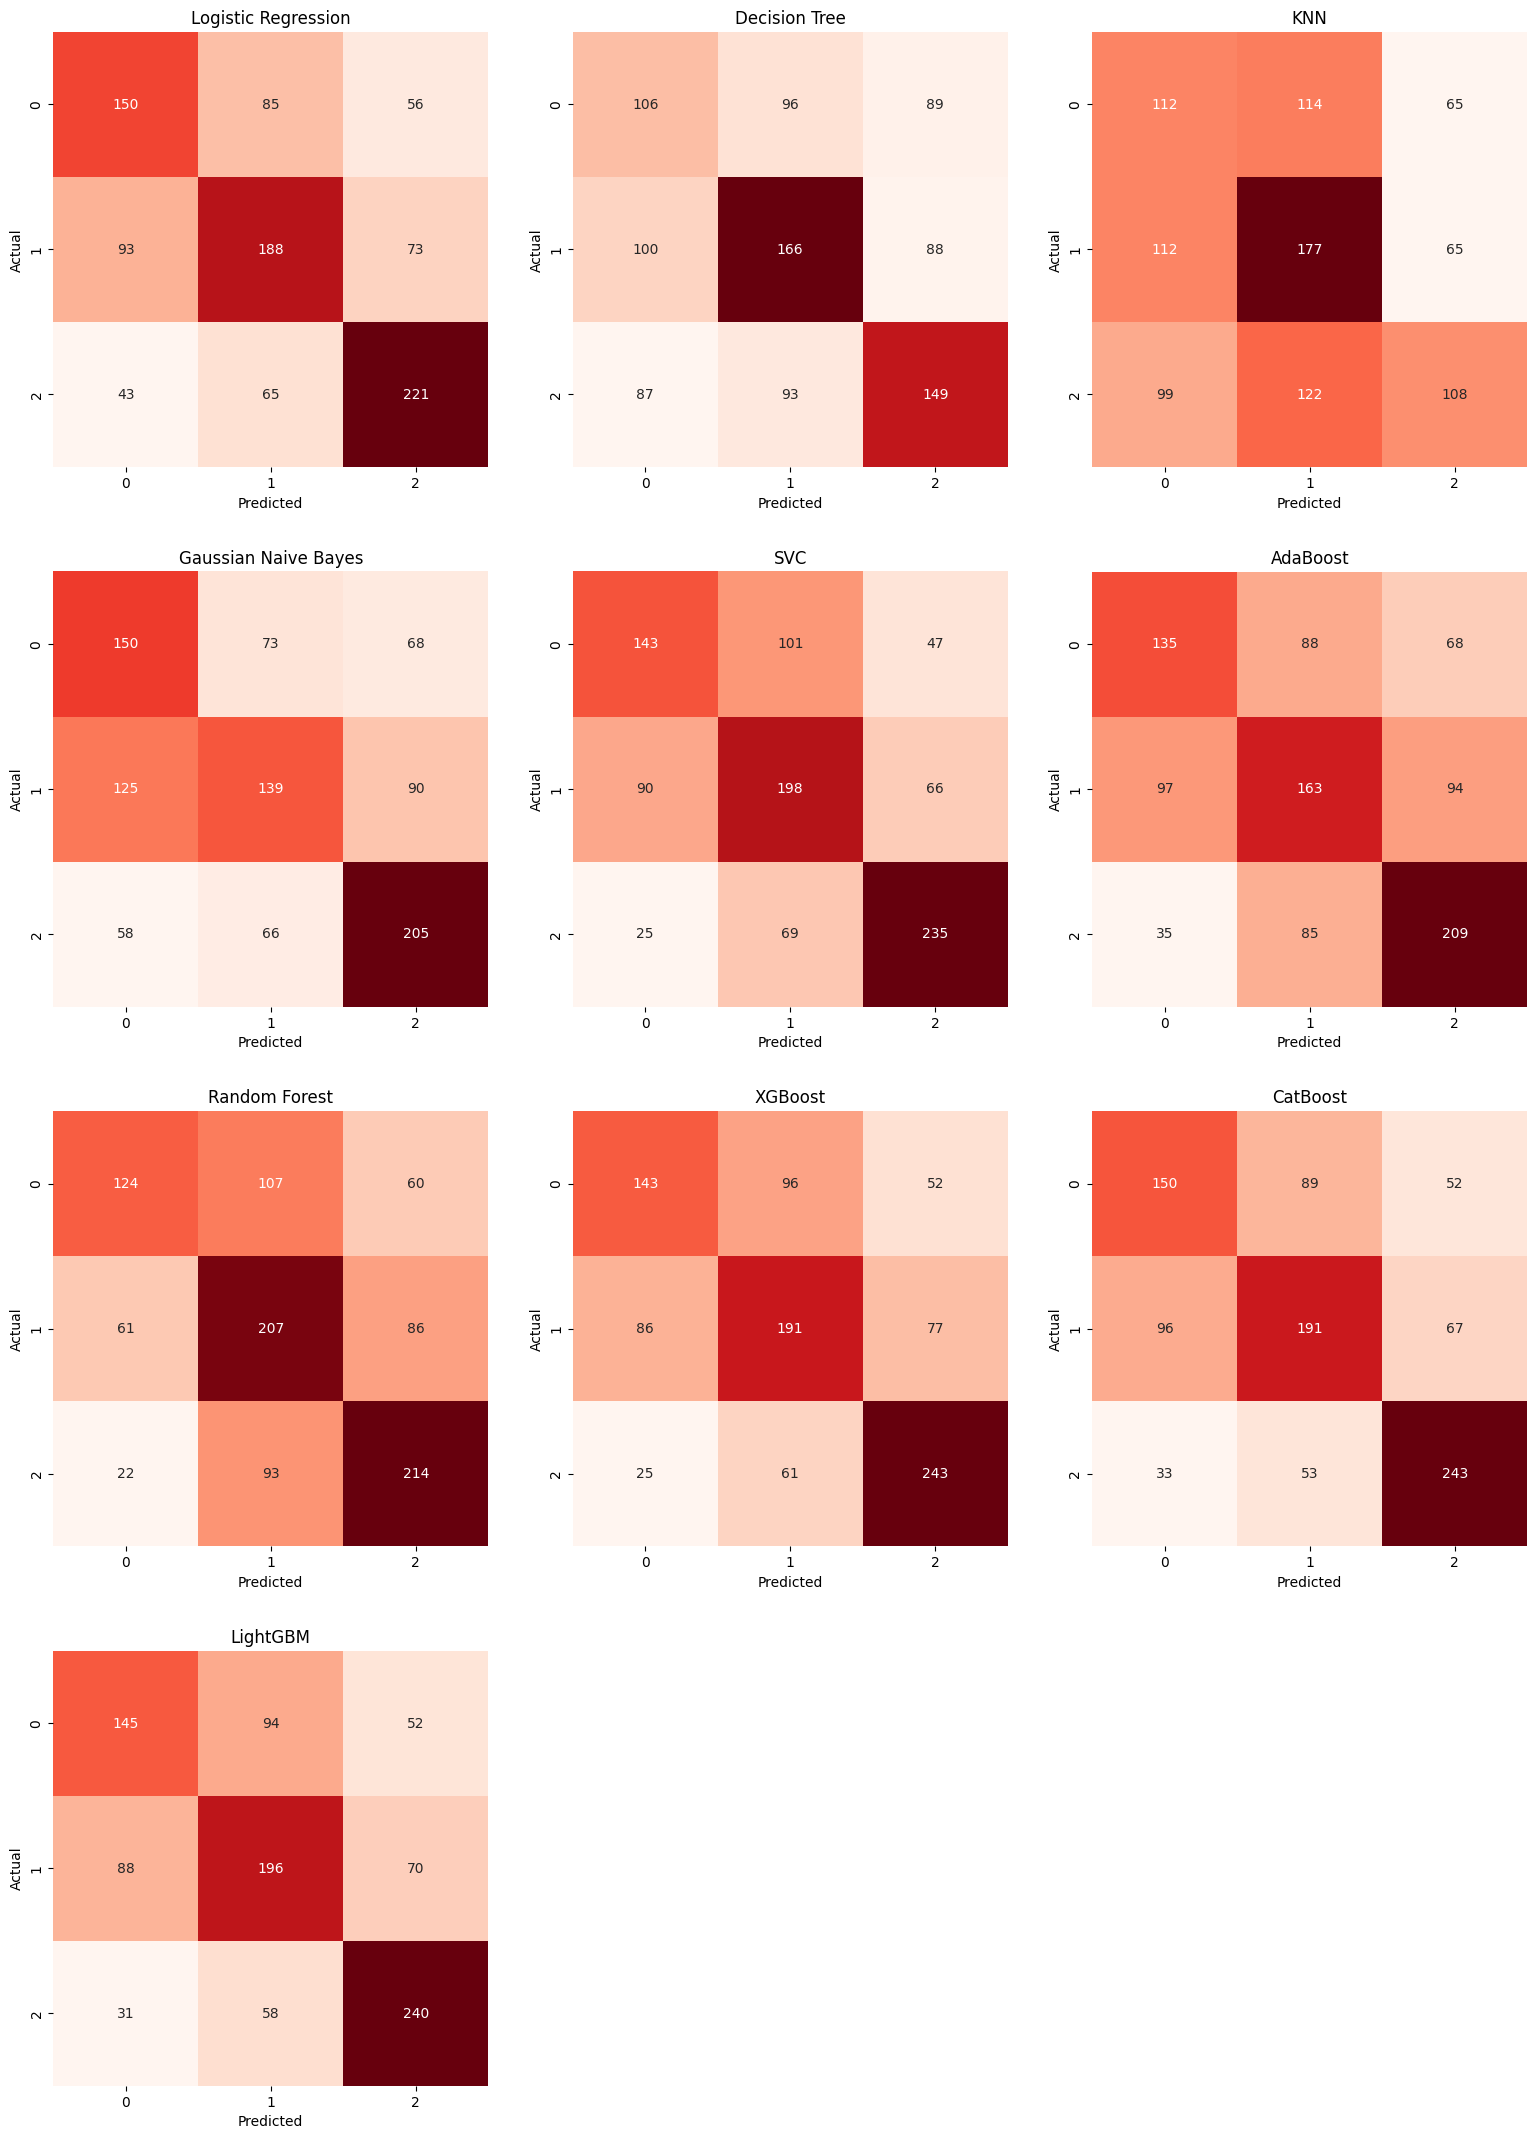

In [14]:
models_bert_efficientnet.Compare_ConfusionMatrices()

In [15]:
models_bert_efficientnet.Compare_Performance()

,Name,Accuracy,AUC,Precision_0,Precision_1,Precision_2,Recall_0,Recall_1,Recall_2,f1-score_0,f1-score_1,f1-score_2
0,Logistic Regression,0.574,0.737,0.524,0.556,0.631,0.515,0.531,0.672,0.520,0.543,0.651
1,Decision Tree,0.432,0.572,0.362,0.468,0.457,0.364,0.469,0.453,0.363,0.468,0.455
2,KNN,0.408,0.585,0.347,0.429,0.454,0.385,0.500,0.328,0.365,0.462,0.381
3,Gaussian Naive Bayes,0.507,0.697,0.450,0.500,0.565,0.515,0.393,0.623,0.481,0.440,0.592
4,SVC,0.591,NaN,0.554,0.538,0.675,0.491,0.559,0.714,0.521,0.548,0.694
5,AdaBoost,0.521,0.697,0.506,0.485,0.563,0.464,0.460,0.635,0.484,0.472,0.597
6,Random Forest,0.560,0.755,0.599,0.509,0.594,0.426,0.585,0.650,0.498,0.544,0.621
7,XGBoost,0.592,0.785,0.563,0.549,0.653,0.491,0.540,0.739,0.525,0.544,0.693
8,CatBoost,0.600,0.787,0.538,0.574,0.671,0.515,0.540,0.739,0.526,0.556,0.703
9,LightGBM,0.597,0.782,0.549,0.563,0.663,0.498,0.554,0.729,0.523,0.558,0.695


### TF-IDF

In [16]:
models_tfidf_efficientnet = Train_Classifiers(tfidf_efficientnet, y)

In [17]:
models_tfidf_efficientnet.fit()

Training Logistic Regression
Logistic Regression Model Trained
Time taken = 10.063 seconds
------------------
Training Decision Tree
Decision Tree Model Trained
Time taken = 53.01 seconds
------------------
Training KNN
KNN Model Trained
Time taken = 0.072 seconds
------------------
Training Multinomial Naive Bayes
Model Skipped
------------------
Training Gaussian Naive Bayes
Gaussian Naive Bayes Model Trained
Time taken = 0.764 seconds
------------------
Training SVC
SVC Model Trained
Time taken = 1193.093 seconds
------------------
Training AdaBoost
AdaBoost Model Trained
Time taken = 134.379 seconds
------------------
Training Random Forest
Random Forest Model Trained
Time taken = 19.797 seconds
------------------
Training XGBoost
XGBoost Model Trained
Time taken = 267.716 seconds
------------------
Training CatBoost
Learning rate set to 0.085654
0:	learn: 1.0841413	total: 84.8ms	remaining: 1m 24s
1:	learn: 1.0724510	total: 144ms	remaining: 1m 11s
2:	learn: 1.0625110	total: 189ms	r

In [18]:
models_tfidf_efficientnet.score()

Logistic Regression: 0.4928131416837782
Decision Tree: 0.49794661190965095
KNN: 0.38295687885010266
Gaussian Naive Bayes: 0.502053388090349
SVC: 0.4209445585215606
AdaBoost: 0.5595482546201233
Random Forest: 0.4681724845995893
XGBoost: 0.5811088295687885
CatBoost: 0.6108829568788501
LightGBM: 0.5790554414784395


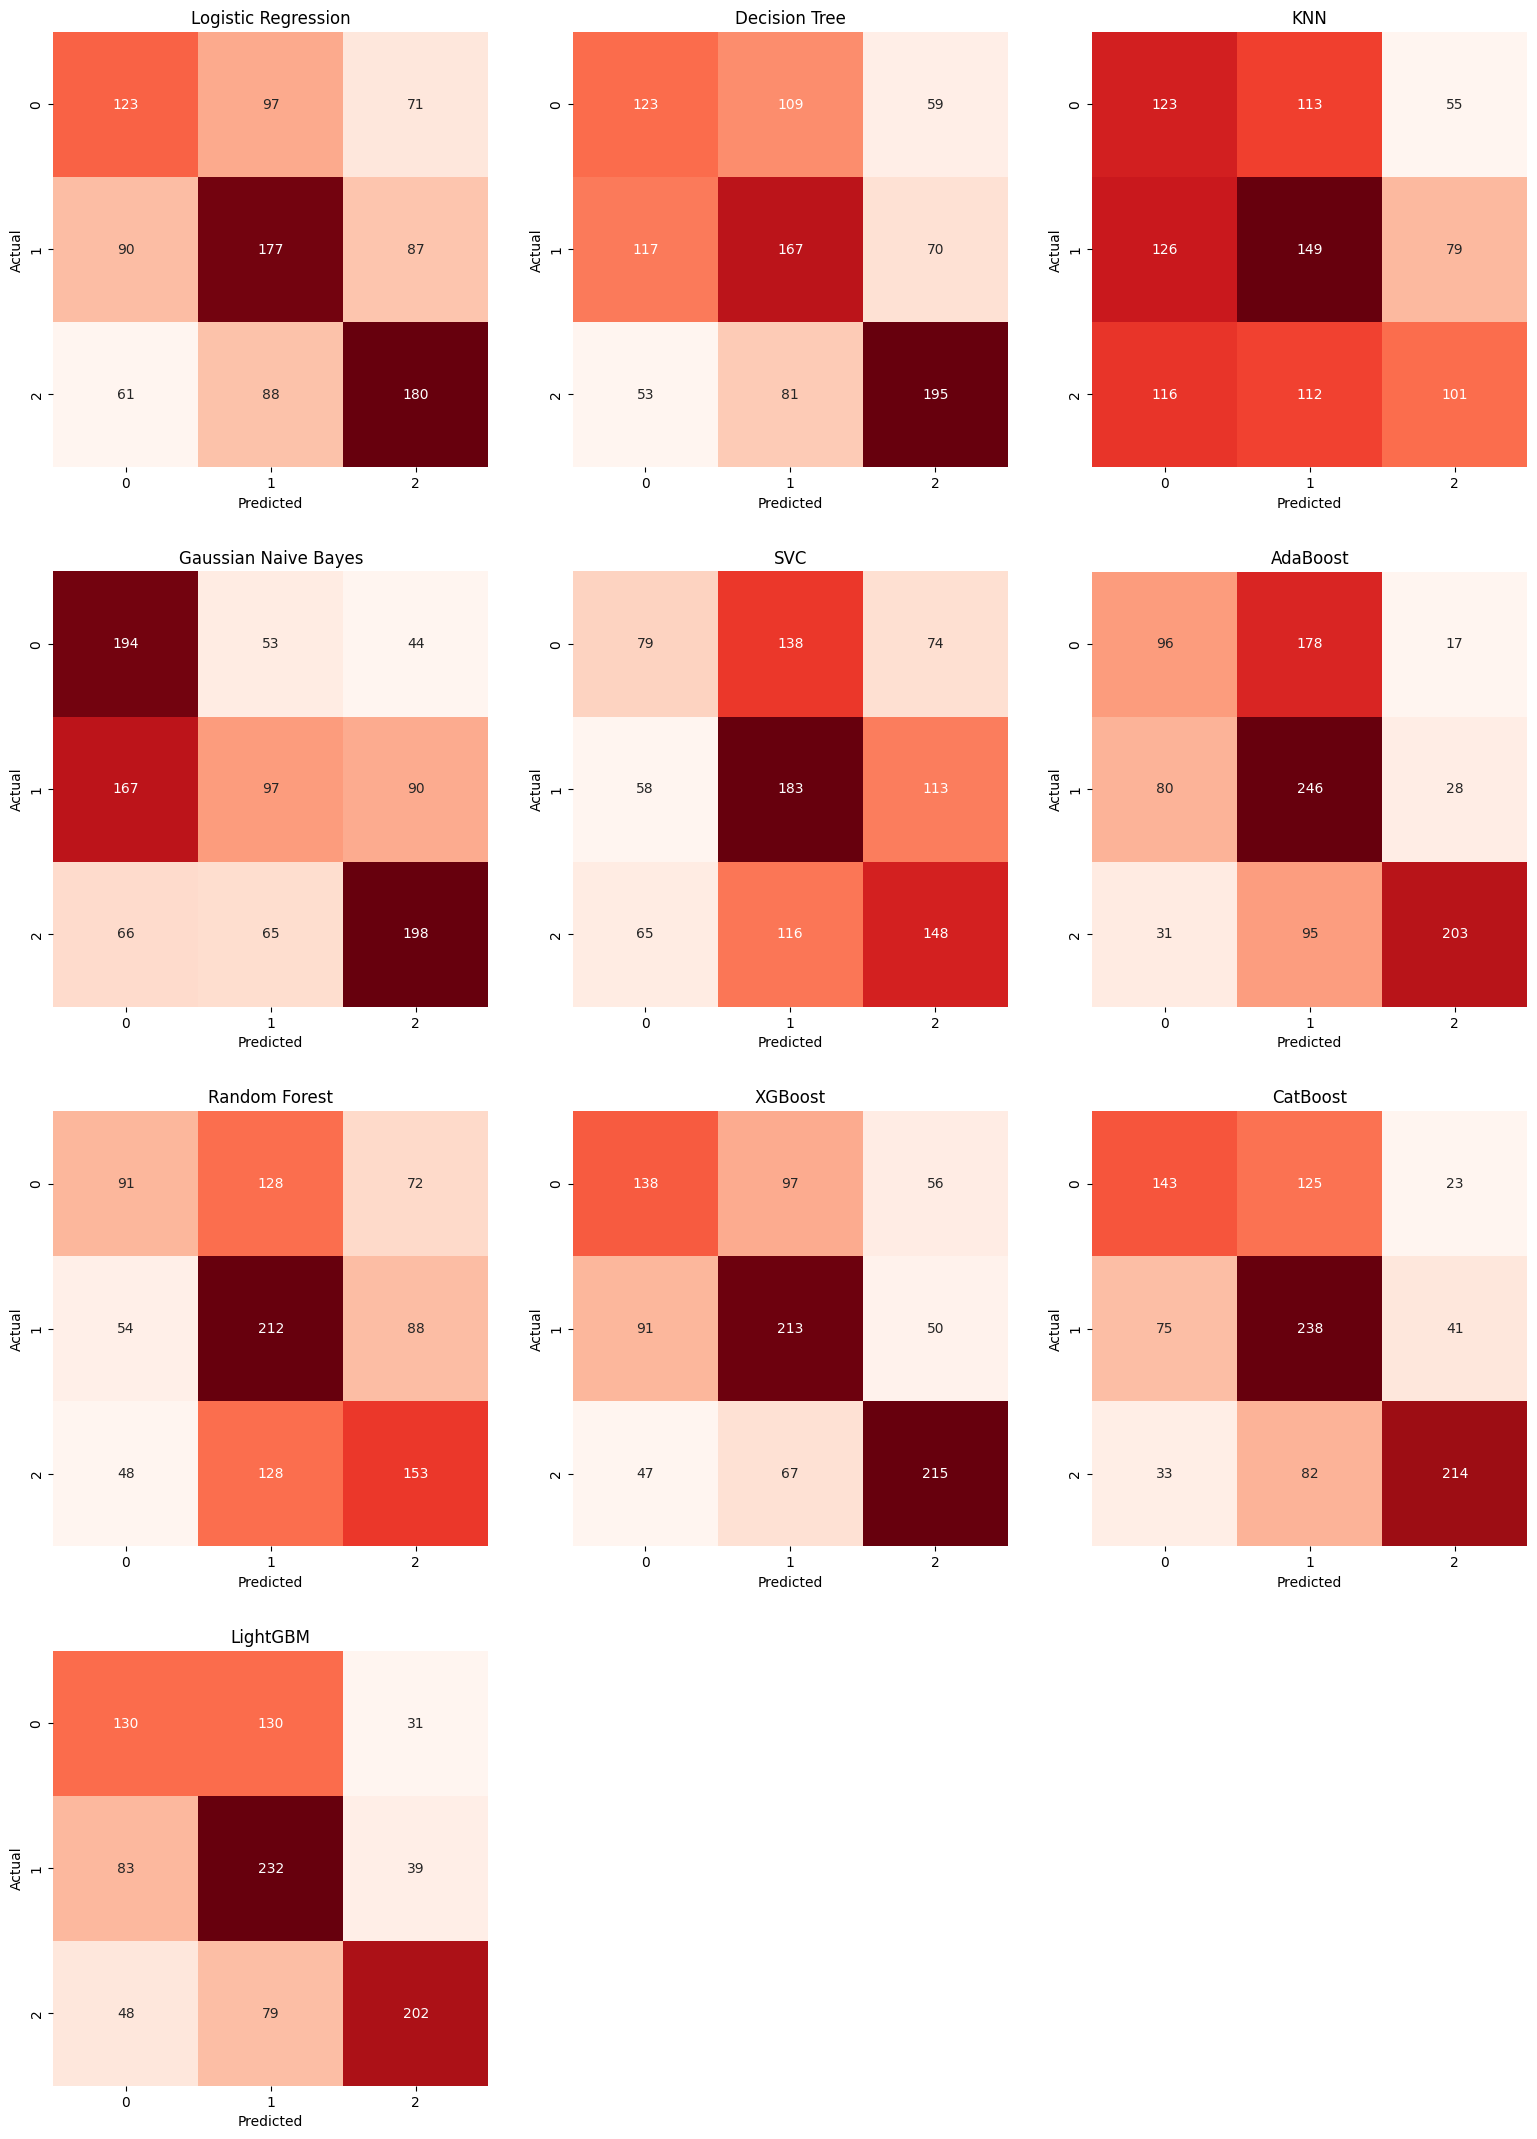

In [19]:
models_tfidf_efficientnet.Compare_ConfusionMatrices()

In [20]:
models_tfidf_efficientnet.Compare_Performance()

,Name,Accuracy,AUC,Precision_0,Precision_1,Precision_2,Recall_0,Recall_1,Recall_2,f1-score_0,f1-score_1,f1-score_2
0,Logistic Regression,0.493,0.651,0.449,0.489,0.533,0.423,0.500,0.547,0.435,0.494,0.540
1,Decision Tree,0.498,0.622,0.420,0.468,0.602,0.423,0.472,0.593,0.421,0.470,0.597
2,KNN,0.383,0.567,0.337,0.398,0.430,0.423,0.421,0.307,0.375,0.409,0.358
3,Gaussian Naive Bayes,0.502,0.635,0.454,0.451,0.596,0.667,0.274,0.602,0.540,0.341,0.599
4,SVC,0.421,NaN,0.391,0.419,0.442,0.271,0.517,0.450,0.320,0.463,0.446
5,AdaBoost,0.560,0.686,0.464,0.474,0.819,0.330,0.695,0.617,0.386,0.564,0.704
6,Random Forest,0.468,0.654,0.472,0.453,0.489,0.313,0.599,0.465,0.376,0.516,0.477
7,XGBoost,0.581,0.772,0.500,0.565,0.670,0.474,0.602,0.653,0.487,0.583,0.662
8,CatBoost,0.611,0.800,0.570,0.535,0.770,0.491,0.672,0.650,0.528,0.596,0.705
9,LightGBM,0.579,0.771,0.498,0.526,0.743,0.447,0.655,0.614,0.471,0.584,0.672


## DenseNet

### BERT

In [21]:
models_bert_densenet = Train_Classifiers(bert_densenet, y)

In [22]:
models_bert_densenet.fit()

Training Logistic Regression
Logistic Regression Model Trained
Time taken = 1.532 seconds
------------------
Training Decision Tree
Decision Tree Model Trained
Time taken = 24.664 seconds
------------------
Training KNN
KNN Model Trained
Time taken = 0.005 seconds
------------------
Training Multinomial Naive Bayes
Model Skipped
------------------
Training Gaussian Naive Bayes
Gaussian Naive Bayes Model Trained
Time taken = 0.057 seconds
------------------
Training SVC
SVC Model Trained
Time taken = 24.093 seconds
------------------
Training AdaBoost
AdaBoost Model Trained
Time taken = 133.217 seconds
------------------
Training Random Forest
Random Forest Model Trained
Time taken = 41.922 seconds
------------------
Training XGBoost
XGBoost Model Trained
Time taken = 162.872 seconds
------------------
Training CatBoost
Learning rate set to 0.085654
0:	learn: 1.0841851	total: 105ms	remaining: 1m 45s
1:	learn: 1.0697407	total: 189ms	remaining: 1m 34s
2:	learn: 1.0572837	total: 272ms	rema

In [23]:
models_bert_densenet.score()

Logistic Regression: 0.5112936344969199
Decision Tree: 0.4188911704312115
KNN: 0.39835728952772076
Gaussian Naive Bayes: 0.4887063655030801
SVC: 0.5082135523613963
AdaBoost: 0.5359342915811088
Random Forest: 0.5482546201232033
XGBoost: 0.5913757700205339
CatBoost: 0.5852156057494866
LightGBM: 0.5759753593429158


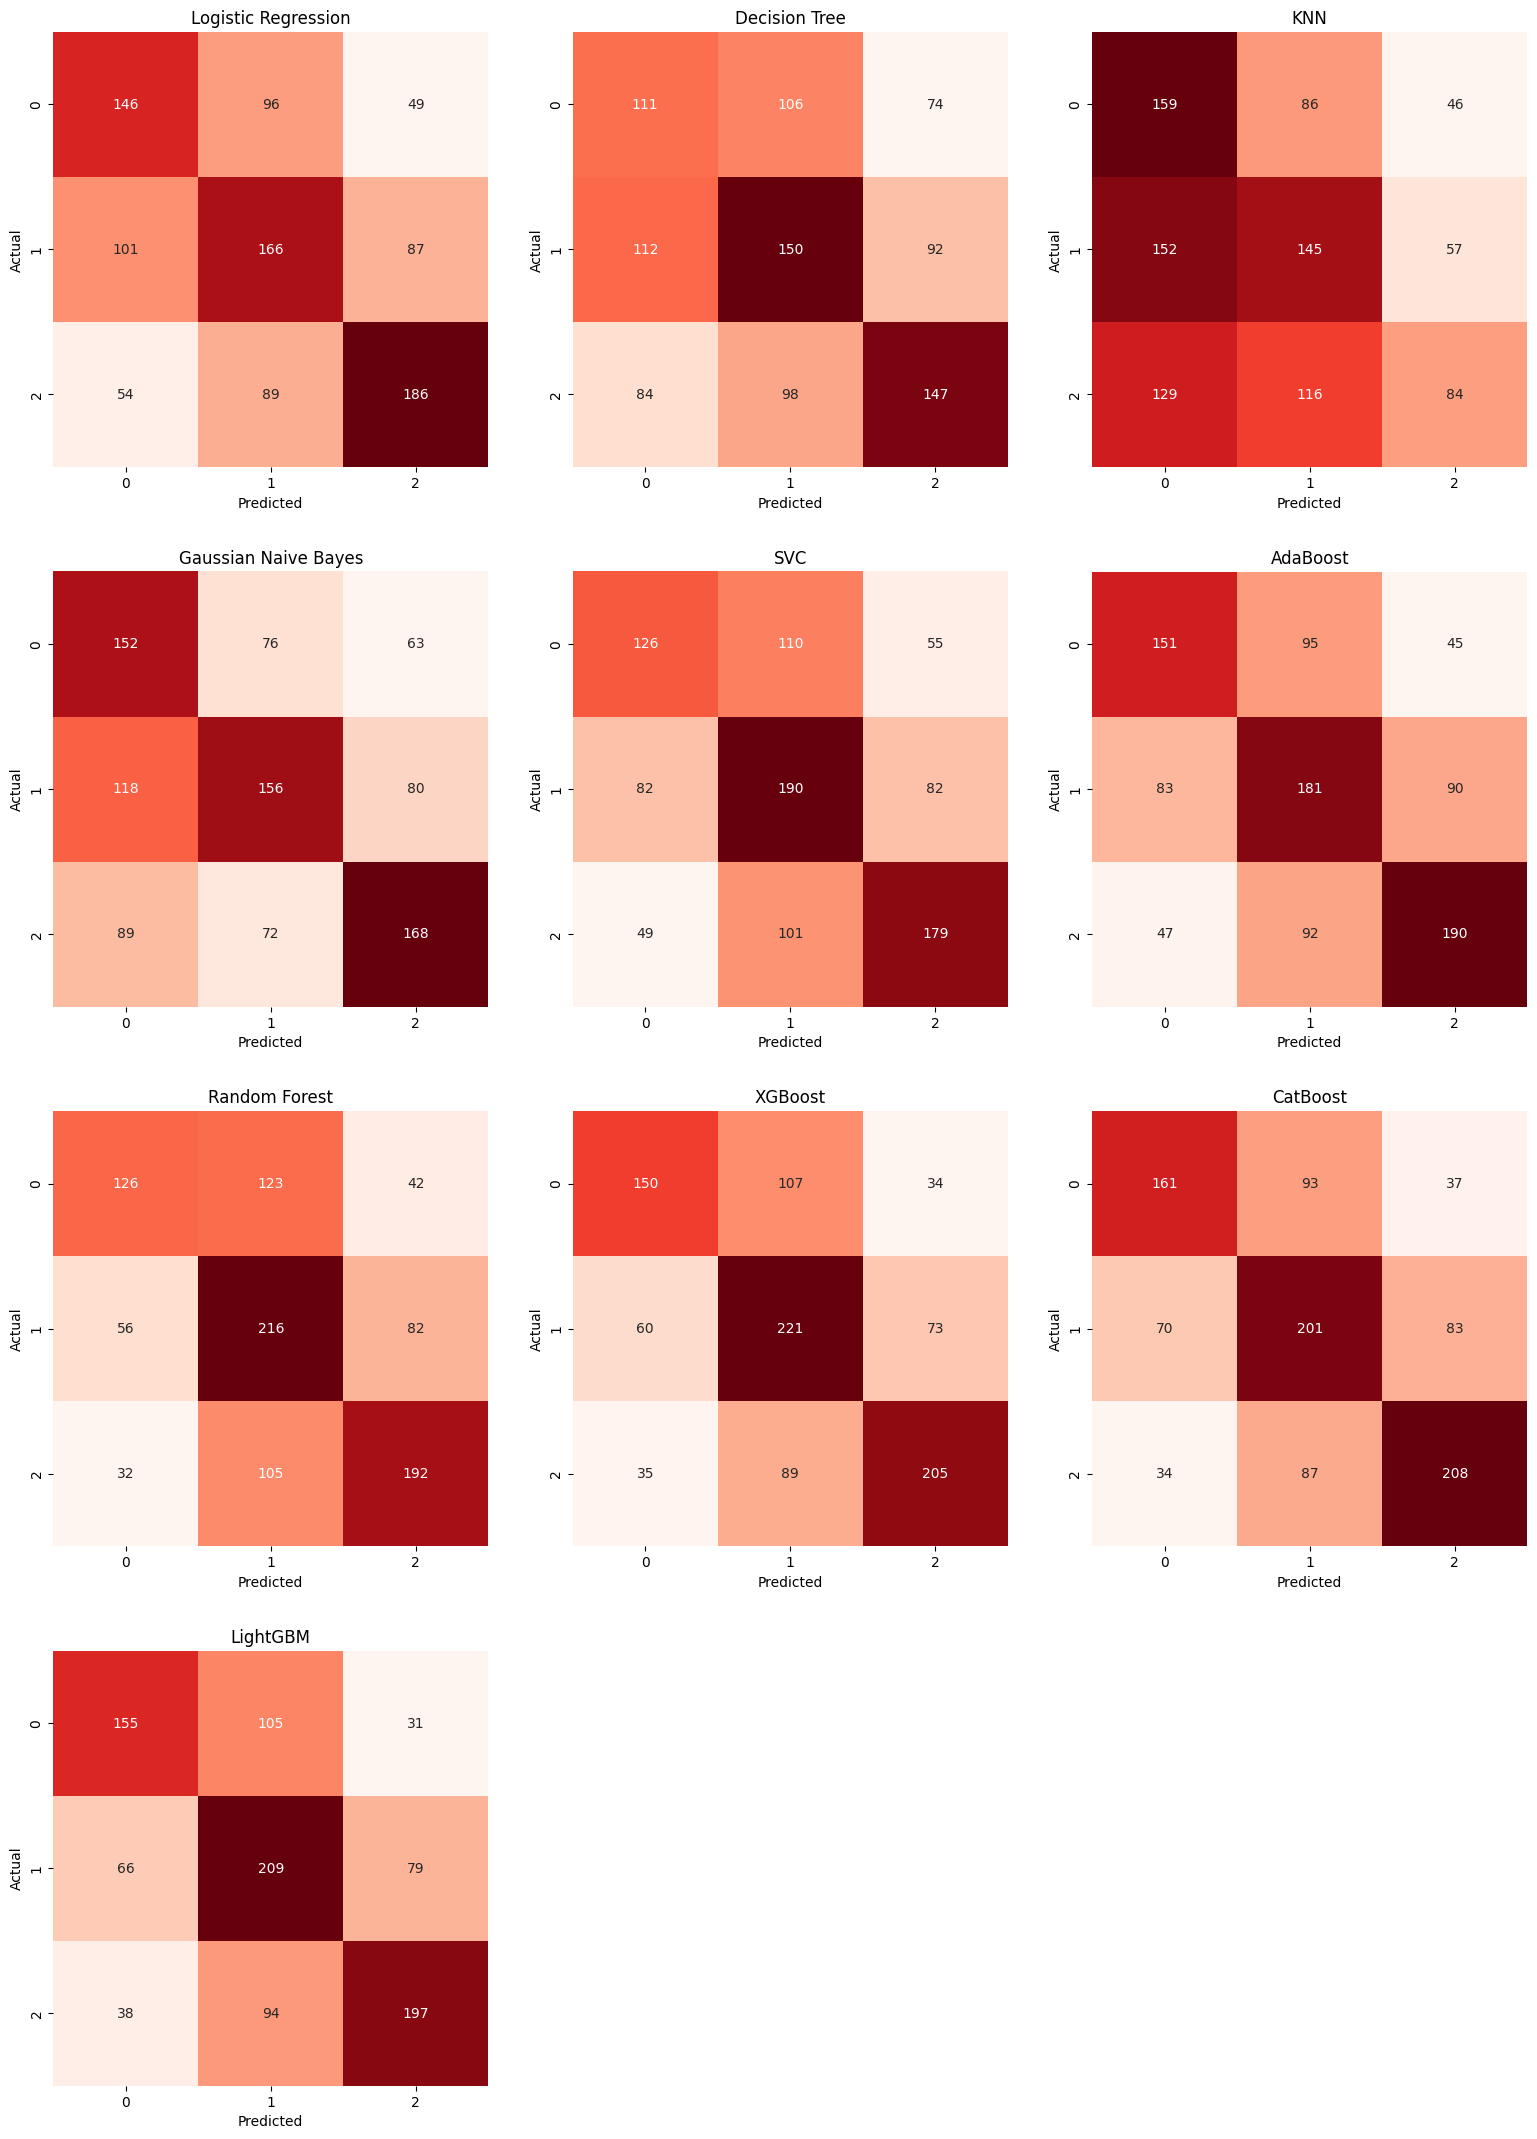

In [24]:
models_bert_densenet.Compare_ConfusionMatrices()

In [25]:
models_bert_densenet.Compare_Performance()

,Name,Accuracy,AUC,Precision_0,Precision_1,Precision_2,Recall_0,Recall_1,Recall_2,f1-score_0,f1-score_1,f1-score_2
0,Logistic Regression,0.511,0.701,0.485,0.473,0.578,0.502,0.469,0.565,0.493,0.471,0.571
1,Decision Tree,0.419,0.563,0.362,0.424,0.470,0.381,0.424,0.447,0.371,0.424,0.458
2,KNN,0.398,0.579,0.361,0.418,0.449,0.546,0.410,0.255,0.435,0.414,0.326
3,Gaussian Naive Bayes,0.489,0.677,0.423,0.513,0.540,0.522,0.441,0.511,0.468,0.474,0.525
4,SVC,0.508,NaN,0.490,0.474,0.566,0.433,0.537,0.544,0.460,0.503,0.555
5,AdaBoost,0.536,0.706,0.537,0.492,0.585,0.519,0.511,0.578,0.528,0.501,0.581
6,Random Forest,0.548,0.746,0.589,0.486,0.608,0.433,0.610,0.584,0.499,0.541,0.595
7,XGBoost,0.591,0.776,0.612,0.530,0.657,0.515,0.624,0.623,0.560,0.573,0.640
8,CatBoost,0.585,0.782,0.608,0.528,0.634,0.553,0.568,0.632,0.579,0.547,0.633
9,LightGBM,0.576,0.778,0.598,0.512,0.642,0.533,0.590,0.599,0.564,0.549,0.619


### TF-IDF

In [26]:
models_tfidf_densenet = Train_Classifiers(tfidf_densenet, y)

In [27]:
models_tfidf_densenet.fit()

Training Logistic Regression
Logistic Regression Model Trained
Time taken = 11.791 seconds
------------------
Training Decision Tree
Decision Tree Model Trained
Time taken = 46.713 seconds
------------------
Training KNN
KNN Model Trained
Time taken = 0.083 seconds
------------------
Training Multinomial Naive Bayes
Multinomial Naive Bayes Model Trained
Time taken = 0.192 seconds
------------------
Training Gaussian Naive Bayes
Gaussian Naive Bayes Model Trained
Time taken = 0.91 seconds
------------------
Training SVC
SVC Model Trained
Time taken = 1123.031 seconds
------------------
Training AdaBoost
AdaBoost Model Trained
Time taken = 148.945 seconds
------------------
Training Random Forest
Random Forest Model Trained
Time taken = 22.723 seconds
------------------
Training XGBoost
XGBoost Model Trained
Time taken = 310.501 seconds
------------------
Training CatBoost
Learning rate set to 0.085654
0:	learn: 1.0849954	total: 87.5ms	remaining: 1m 27s
1:	learn: 1.0735174	total: 160ms	r

In [28]:
models_tfidf_densenet.score()

Logistic Regression: 0.3655030800821355
Decision Tree: 0.49589322381930184
KNN: 0.39835728952772076
Multinomial Naive Bayes: 0.446611909650924
Gaussian Naive Bayes: 0.4928131416837782
SVC: 0.4271047227926078
AdaBoost: 0.5605749486652978
Random Forest: 0.46303901437371664
XGBoost: 0.5636550308008214
CatBoost: 0.6119096509240246
LightGBM: 0.5749486652977412


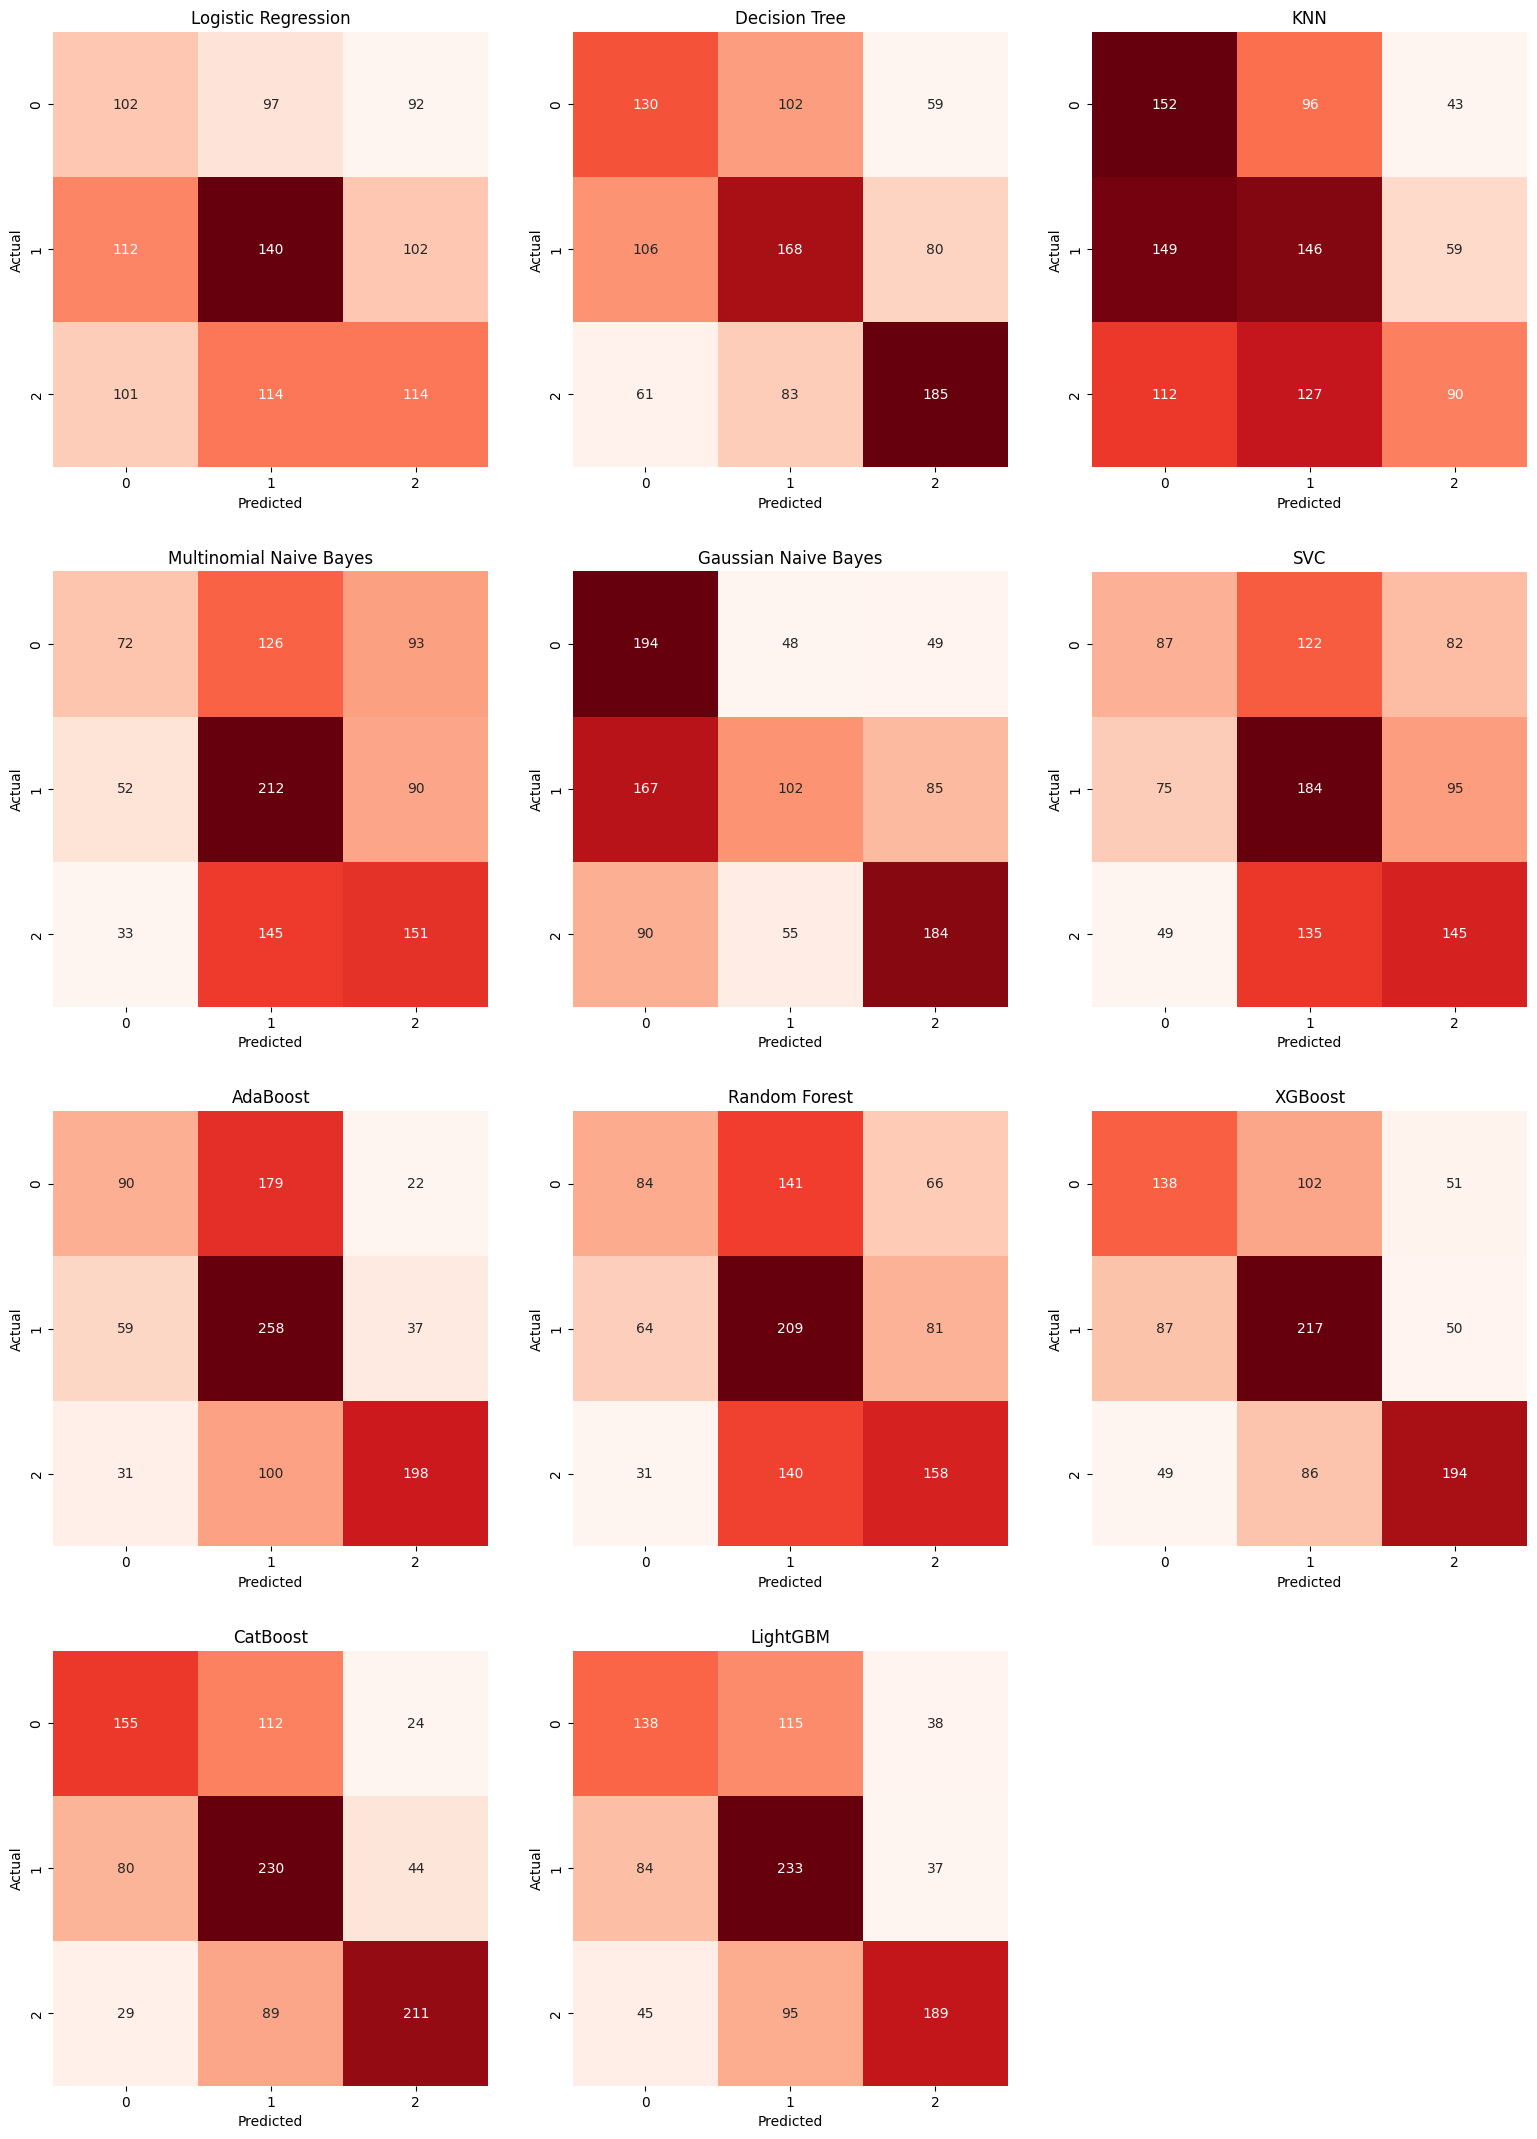

In [29]:
models_tfidf_densenet.Compare_ConfusionMatrices()

In [30]:
models_tfidf_densenet.Compare_Performance()

,Name,Accuracy,AUC,Precision_0,Precision_1,Precision_2,Recall_0,Recall_1,Recall_2,f1-score_0,f1-score_1,f1-score_2
0,Logistic Regression,0.366,0.550,0.324,0.399,0.370,0.351,0.395,0.347,0.337,0.397,0.358
1,Decision Tree,0.496,0.621,0.438,0.476,0.571,0.447,0.475,0.562,0.442,0.475,0.567
2,KNN,0.398,0.571,0.368,0.396,0.469,0.522,0.412,0.274,0.432,0.404,0.345
3,Multinomial Naive Bayes,0.447,0.633,0.459,0.439,0.452,0.247,0.599,0.459,0.321,0.507,0.456
4,Gaussian Naive Bayes,0.493,0.629,0.430,0.498,0.579,0.667,0.288,0.559,0.523,0.365,0.569
5,SVC,0.427,NaN,0.412,0.417,0.450,0.299,0.520,0.441,0.347,0.463,0.445
6,AdaBoost,0.561,0.664,0.500,0.480,0.770,0.309,0.729,0.602,0.382,0.579,0.676
7,Random Forest,0.463,0.661,0.469,0.427,0.518,0.289,0.590,0.480,0.357,0.495,0.498
8,XGBoost,0.564,0.749,0.504,0.536,0.658,0.474,0.613,0.590,0.488,0.572,0.622
9,CatBoost,0.612,0.783,0.587,0.534,0.756,0.533,0.650,0.641,0.559,0.586,0.694


# Cross Validation

## EfficientNet

### BERT

In [34]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(task_type='GPU'),
    'LightGBM': LGBMClassifier()
}

In [38]:
cv_bert_efficientnet_acc = CrossValidateClassifiers(models, bert_efficientnet, y)

For Logistic Regression
Test Scores = [0.57700205 0.51950719 0.52464066 0.53593429 0.58581706]
Mean Test Score = 0.5485802499097818
Time taken = 8.968 seconds

For SVC
Test Scores = [0.55441478 0.52977413 0.5687885  0.59240246 0.58992806]
Mean Test Score = 0.5670615868701343
Time taken = 81.901 seconds

For XGBoost
Test Scores = [0.59034908 0.54620123 0.54312115 0.58213552 0.61253854]
Mean Test Score = 0.5748691044231202
Time taken = 831.618 seconds

For CatBoost
Test Scores = [0.59137577 0.54928131 0.5862423  0.61088296 0.61459404]
Mean Test Score = 0.5904752759833787
Time taken = 855.891 seconds

For LightGBM
Test Scores = [0.58829569 0.53901437 0.52566735 0.60882957 0.62898253]
Mean Test Score = 0.5781579019565223
Time taken = 151.628 seconds



### TF-IDF

In [39]:
models = {
    'Logistic Regression': LogisticRegression(),
    # 'SVC': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(task_type='GPU'),
    'LightGBM': LGBMClassifier()
}

In [40]:
cv_tfidf_efficientnet_acc = CrossValidateClassifiers(models, tfidf_efficientnet, y)

For Logistic Regression
Test Scores = [0.47330595 0.45379877 0.40965092 0.45995893 0.50051387]
Mean Test Score = 0.4594456907340071
Time taken = 57.557 seconds

For XGBoost
Test Scores = [0.57802875 0.50924025 0.49281314 0.52772074 0.59815005]
Mean Test Score = 0.5411905852261575
Time taken = 1343.027 seconds

For CatBoost
Test Scores = [0.61293634 0.54620123 0.53798768 0.58110883 0.63823227]
Mean Test Score = 0.5832932715136192
Time taken = 677.061 seconds

For LightGBM
Test Scores = [0.55749487 0.52464066 0.49691992 0.52874743 0.6032888 ]
Mean Test Score = 0.5422183344553456
Time taken = 107.05 seconds



## DenseNet

### BERT

In [45]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(task_type='GPU'),
    'LightGBM': LGBMClassifier()
}

In [46]:
cv_bert_densenet_acc = CrossValidateClassifiers(models, bert_densenet, y)

For Logistic Regression
Test Scores = [0.52874743 0.49691992 0.48767967 0.52772074 0.54265159]
Mean Test Score = 0.5167438709636574
Time taken = 9.621 seconds

For SVC
Test Scores = [0.50718686 0.48665298 0.50924025 0.5        0.53340185]
Mean Test Score = 0.5072963864168273
Time taken = 97.42 seconds

For XGBoost
Test Scores = [0.59445585 0.52464066 0.54620123 0.59650924 0.61767729]
Mean Test Score = 0.5758968536523084
Time taken = 868.19 seconds

For CatBoost
Test Scores = [0.6026694  0.5523614  0.57084189 0.61909651 0.62692703]
Mean Test Score = 0.5943792457966744
Time taken = 1001.15 seconds

For LightGBM
Test Scores = [0.59342916 0.52156057 0.54928131 0.60061602 0.61253854]
Mean Test Score = 0.5754851208502251
Time taken = 167.158 seconds



### TF-IDF

In [42]:
cv_tfidf_densenet_acc = CrossValidateClassifiers(models, tfidf_densenet, y)

For Logistic Regression
Test Scores = [0.37371663 0.38603696 0.37474333 0.39835729 0.38540596]
Mean Test Score = 0.3836520340782229
Time taken = 61.893 seconds

For XGBoost
Test Scores = [0.53798768 0.49281314 0.52977413 0.52566735 0.59403905]
Mean Test Score = 0.5360562708530741
Time taken = 1554.608 seconds

For CatBoost
Test Scores = [0.59240246 0.53901437 0.5523614  0.59240246 0.63309353]
Mean Test Score = 0.5818548446663614
Time taken = 1513.849 seconds

For LightGBM
Test Scores = [0.56057495 0.50821355 0.51848049 0.54414784 0.60945529]
Mean Test Score = 0.5481744261381742
Time taken = 120.091 seconds



## Plotting

### Multimodal

In [50]:
cv_bert_efficientnet_acc = [0.5485802499097818, 0.5670615868701343, 0.5748691044231202, 0.5904752759833787, 0.5781579019565223]
cv_tfidf_efficientnet_acc = [0.4594456907340071 , np.nan, 0.5411905852261575, 0.5832932715136192, 0.5422183344553456]
cv_bert_densenet_acc = [0.5167438709636574, 0.5072963864168273, 0.5758968536523084, 0.5943792457966744, 0.5754851208502251]
cv_tfidf_densenet_acc= [0.3836520340782229, np.nan, 0.5360562708530741, 0.5818548446663614, 0.5481744261381742]

In [65]:
df = pd.DataFrame(columns=['Dataset', 'Accuracy', 'Model'])
for i in range(20):
    if i < 5:
        df.loc[i, 'Dataset'] = 'BERT+EfficientNet'
        df.loc[i, 'Accuracy'] = cv_bert_efficientnet_acc[i]
    elif i < 10:
        df.loc[i, 'Dataset'] = 'TF-IDF+EfficientNet'
        df.loc[i, 'Accuracy'] = cv_tfidf_efficientnet_acc[i-5]
    elif i < 15:
        df.loc[i, 'Dataset'] = 'BERT+DenseNet'
        df.loc[i, 'Accuracy'] = cv_bert_densenet_acc[i-10]
    elif i < 20:
        df.loc[i, 'Dataset'] = 'TF-IDF+DenseNet'
        df.loc[i, 'Accuracy'] = cv_tfidf_densenet_acc[i-15]

    if i % 5 == 0:
        df.loc[i, 'Model'] = 'Logistic Regression'
    if i % 5 == 1:
        df.loc[i, 'Model'] = 'SVC'
    if i % 5 == 2:
        df.loc[i, 'Model'] = 'XGBoost'
    if i % 5 == 3:
        df.loc[i, 'Model'] = 'CatBoost'
    if i % 5 == 4:
        df.loc[i, 'Model'] = 'LightGBM'

df

,Dataset,Accuracy,Model
0,BERT+EfficientNet,0.54858,Logistic Regression
1,BERT+EfficientNet,0.567062,SVC
2,BERT+EfficientNet,0.574869,XGBoost
3,BERT+EfficientNet,0.590475,CatBoost
4,BERT+EfficientNet,0.578158,LightGBM
5,TF-IDF+EfficientNet,0.459446,Logistic Regression
6,TF-IDF+EfficientNet,NaN,SVC
7,TF-IDF+EfficientNet,0.541191,XGBoost
8,TF-IDF+EfficientNet,0.583293,CatBoost
9,TF-IDF+EfficientNet,0.542218,LightGBM


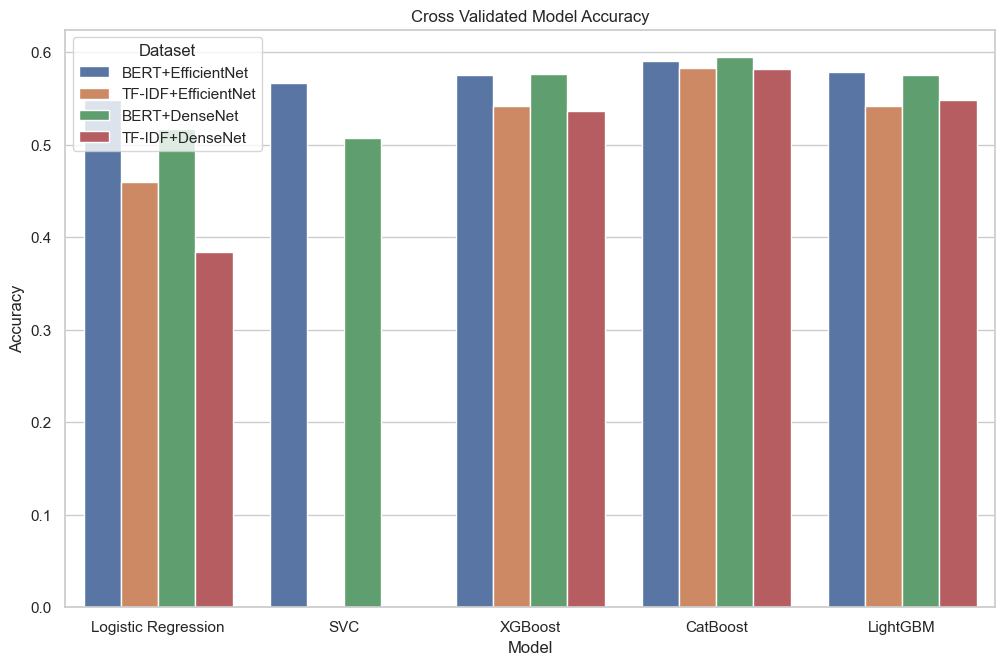

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[12,7.5])
plt.title("Cross Validated Model Accuracy")
sns.set_style("whitegrid")
sns.barplot(df, x="Model", y="Accuracy", hue="Dataset")
plt.xlabel("Model")
plt.show()

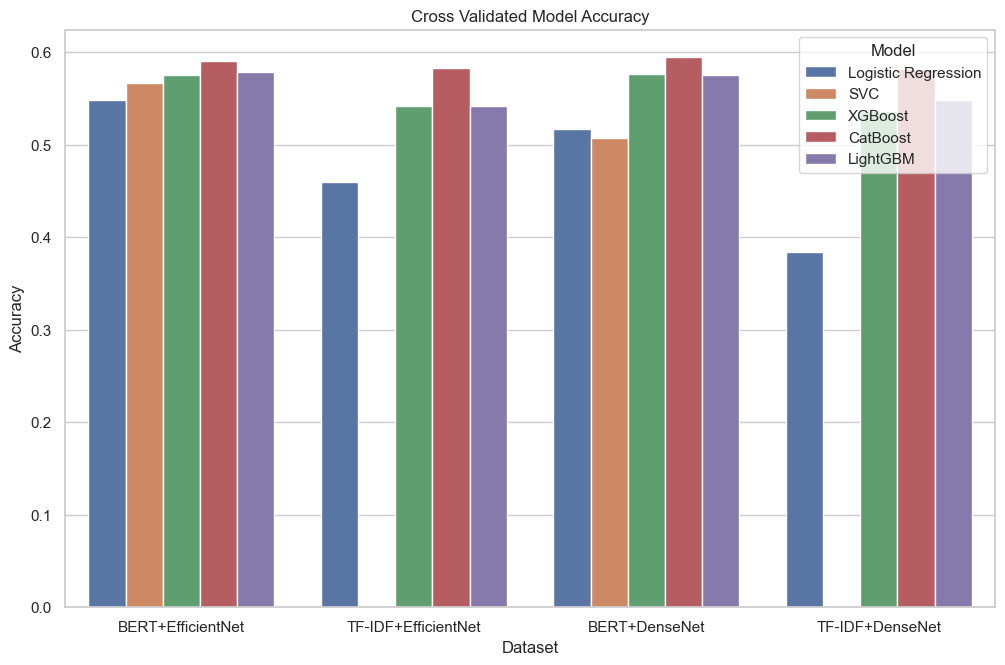

In [79]:
plt.figure(figsize=[12,7.5])
plt.title("Cross Validated Model Accuracy")
sns.barplot(df, x="Dataset", y="Accuracy", hue="Model")
plt.show()

In [73]:
df.to_csv("../Data/Performance/01_inital_multimodal.csv", index=False)

### Comparison with text only

In [85]:
cv_bert_only = [0.5941732738772314, 0.5958134519078783, 0.5802077024212252, 0.5960217452321511, 0.5867814988255803]
cv_tfidf_only =  [0.6292906419950575, 0.6155354742313512, 0.6305235189964778, 0.6370945719223976, 0.5676824571437014]

In [86]:
text_only_df = pd.DataFrame(columns=['Dataset', 'Accuracy', 'Model'])
for i in range(10):
    if i < 5:
        text_only_df.loc[i, 'Dataset'] = 'BERT only'
        text_only_df.loc[i, 'Accuracy'] = cv_bert_only[i]
    elif i < 10:
        text_only_df.loc[i, 'Dataset'] = 'TF-IDF only'
        text_only_df.loc[i, 'Accuracy'] = cv_tfidf_only[i-5]

    if i % 5 == 0:
        text_only_df.loc[i, 'Model'] = 'Logistic Regression'
    if i % 5 == 1:
        text_only_df.loc[i, 'Model'] = 'SVC'
    if i % 5 == 2:
        text_only_df.loc[i, 'Model'] = 'XGBoost'
    if i % 5 == 3:
        text_only_df.loc[i, 'Model'] = 'CatBoost'
    if i % 5 == 4:
        text_only_df.loc[i, 'Model'] = 'LightGBM'

text_only_df

,Dataset,Accuracy,Model
0,BERT only,0.594173,Logistic Regression
1,BERT only,0.595813,SVC
2,BERT only,0.580208,XGBoost
3,BERT only,0.596022,CatBoost
4,BERT only,0.586781,LightGBM
5,TF-IDF only,0.629291,Logistic Regression
6,TF-IDF only,0.615535,SVC
7,TF-IDF only,0.630524,XGBoost
8,TF-IDF only,0.637095,CatBoost
9,TF-IDF only,0.567682,LightGBM


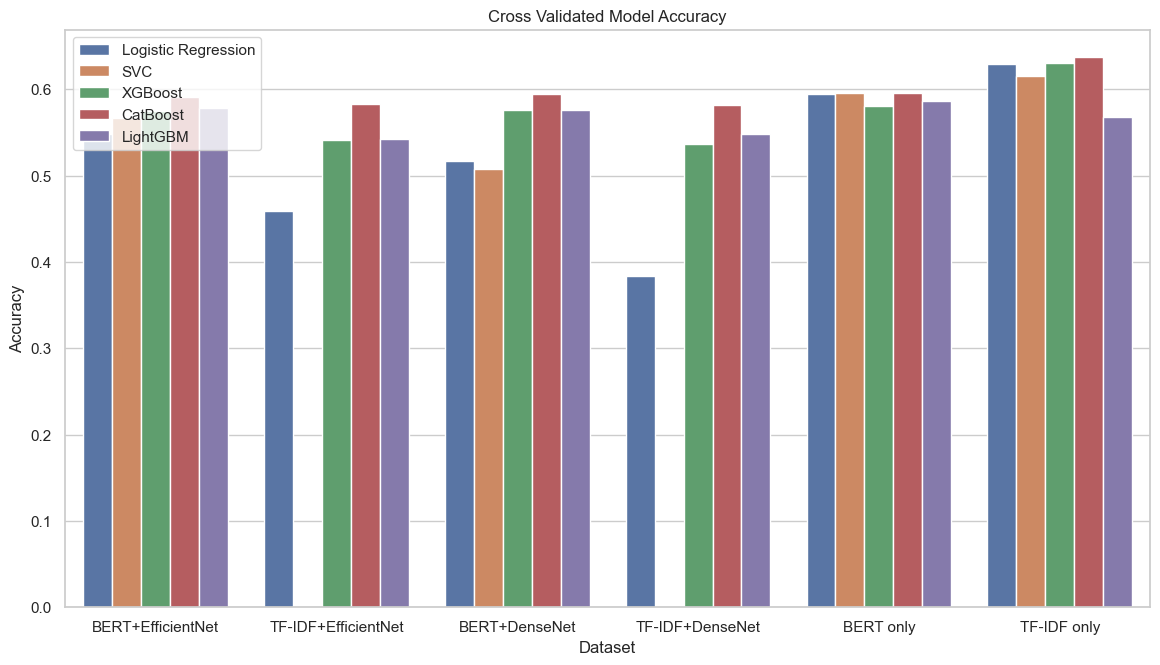

In [87]:
plt.figure(figsize=[14,7.5])
plt.title("Cross Validated Model Accuracy")
sns.set_style("whitegrid")
sns.barplot(pd.concat([df, text_only_df], axis=0).reset_index(drop=True), x="Dataset", y="Accuracy", hue="Model")
plt.xlabel("Dataset")
plt.legend(loc='upper left')
plt.show()